In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [27]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in range(num_episodes):
        visited_states = []
        observation = env.reset()
        visited_states.append(observation)
        for t in range(100):
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            if done:
                for state in visited_states:
                    returns_sum[state] += reward
                    returns_count[state] += 1
                break
            else:
                if observation not in visited_states:
                    visited_states.append(observation)
                for state in visited_states:
                    returns_sum[state] += reward
                
    for state in returns_count.keys():
        V[state] = returns_sum[state] / returns_count[state]
        
    return V    

In [28]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

12
15
21
20
19
21
21
14
15
20
15
12
18
16
16
20
13
14
16
13
17
13
12
15
12
21
21
19
14
20
17
17
13
14
15
20
18
16
21
14
18
19
13
17
19
20
18
18
12
15
20
20
17
12
15
19
18
14
13
12
20
18
15
13
13
17
21
17
20
15
17
18
21
12
13
19
20
13
12
18
16
19
12
17
16
19
18
14
16
14
13
14
18
21
17
19
21
16
19
14
21
14
17
19
21
15
16
15
17
12
16
21
15
17
19
15
20
16
19
17
14
21
12
16
21
13
21
13
16
15
17
18
14
18
18
17
13
14
21
12
20
13
20
21
18
19
15
19
19
12
17
19
15
21
18
17
18
15
16
15
17
17
13
16
20
16
13
18
20
16
20
19
16
20
19
18
20
12
18
13
15
16
14
12
14
14
21
16
19
14
13
15
20
13
12
14
14
12
12
12


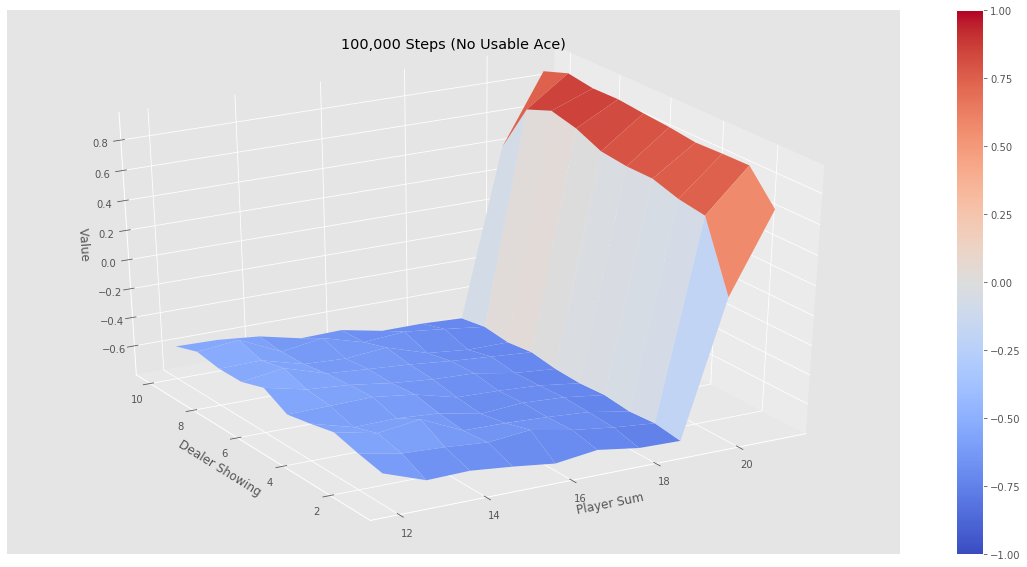

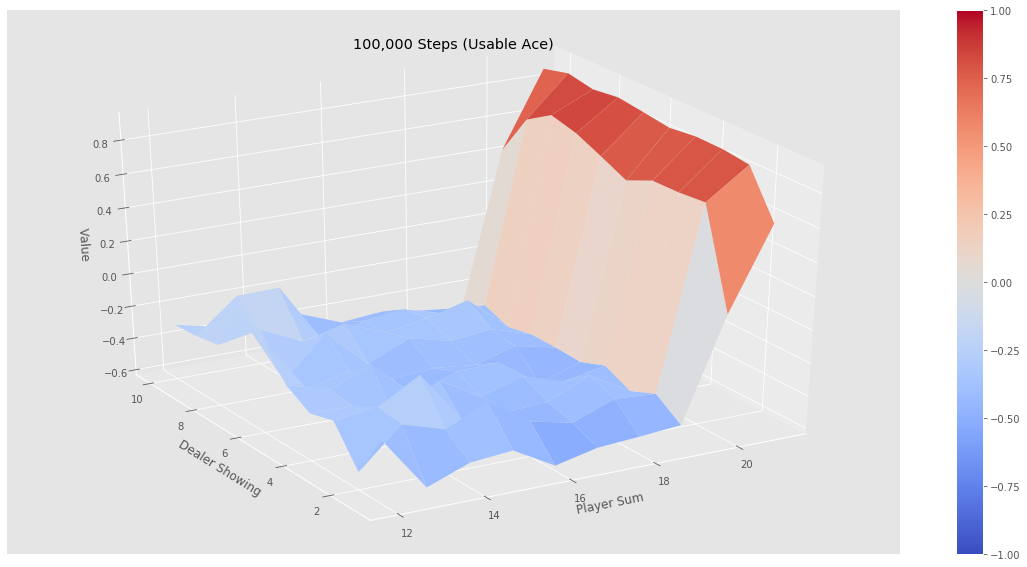

In [26]:
# V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
# plotting.plot_value_function(V_10k, title="10,000 Steps")

# V_100k = mc_prediction(sample_policy, env, num_episodes=100000)
# plotting.plot_value_function(V_100k, title="100,000 Steps")

# V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
# plotting.plot_value_function(V_500k, title="500,000 Steps")